![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()
df.dropna()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.000000
1,5342103,"NO!, Let him, we need a Conservative government.",0.000000
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.200000
3,551008,"As always, yours is dripping with sarcasm, whi...",0.000000
4,865998,The dirty little secret is that the price rang...,0.300000
...,...,...,...
541457,5370921,"You wrote: ""Both parties campaigned explicitly...",0.000000
541458,6331124,Nowadays. there sure seem to be a lot of credi...,0.200000
541459,5465619,We are lucky wealth filters down to the poor i...,0.000000
541460,474392,You are half right. Both nature and humans can...,0.000000


<AxesSubplot:>

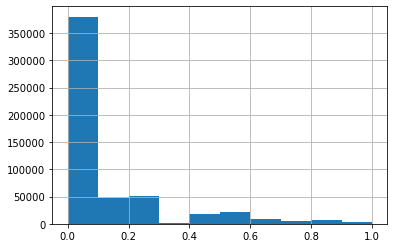

In [ ]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [4]:
# Separación de variable de interés (y)
y = df.target
y.describe()


count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [5]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text
X.describe()

count         541462
unique        537207
top       Well said.
freq              57
Name: comment_text, dtype: object

In [6]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_train = (y_train>=0.5).astype(int)
y_test = (y_test>=0.5).astype(int)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 1
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error

# Vector entrenamiento y Test

vect_A = CountVectorizer(lowercase=False)
X_dtm_A = vect_A.fit_transform(X_train)
Xt_dtm_A = vect_A.transform(X_test)

# definir modelo
nb = MultinomialNB()
pd.Series(cross_val_score(nb, X, y, cv=10)).describe()


# entrenar modelo
nb.fit(X_dtm_A, y_train)

# Hacemos la prediccion y obervamos los resultados 
#y_pred = nb.predict(Xt_dtm_A)

y_pred = nb.predict(Xt_dtm_A)
mseCountVEctorizaer = mean_squared_error(y_test, y_pred)
print("MSE:", mseCountVEctorizaer)

MSE: 0.07933043434462148


Para el primer punto se utilizó un  modelo de clasificación de Naive Bayes utilizando un conjunto de datos de entrenamiento y la función CountVectorizer. Este modelo fue evaluado por el MSE con un valor de 0.07933.

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 2

# Vector entrenamiento

vect_B = CountVectorizer(lowercase=False, ngram_range=(1, 4))
X_dtm_B = vect_B.fit_transform(X_train)
# Vector test
Xt_dtm_B = vect_B.transform(X_test)

# definir modelo

nb = MultinomialNB()
# pd.Series(cross_val_score(nb, X_dtm_A, y_train, cv=10)).describe()

# entrenar modelo
nb.fit(X_dtm_B, y_train)

# predicción y clasificación

y_pred = nb.predict(Xt_dtm_B)
mseCountVEctorizaerwithTrigrams = mean_squared_error(y_test, y_pred)
print("MSE:", mseCountVEctorizaerwithTrigrams)

MSE: 0.07978934761560977


En este punto se puede observar que nuevamente el MSE obtenido es bajo de 0.0797, lo que indica que el modelo tiene una buena capacidad de generalización y es capaz de clasificar correctamente la mayoría de los comentarios. Entre ambos, la diferencia del MSE es pequeña por lo que podemos determinar que la inclusión de trigramas no aporta significativamente a la capacidad de clasificación del modelo.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

# Celda 3


## TfidfVectorizer
TF-IDF es una abreviatura de Term Frequency Inverse Document Frequency, este algoritmo pondera el recuento de las palabras según la frecuencia que tienen en los documentos, 
esto quiere decir que compara el número de veces que la palabra aparece en un documento con el número de documentos donde aparece la palabra. 

Cálculo:

TF(t) = (N º de veces que aparece el término 't' en un documento ) / ( Frecuencia del término más común en un documento)

IDF(t) = log e [ (1+n) / ( 1 + df(t) ) ] + 1 (por defecto i:e smooth_idf = True)

TF-IDF= TF(t) * IDF(t)

Ventajas:
- Evita poner demasiado peso a las palabras que aparecen con mucha frecuencia
- Se pude calcular la similitud entre 2 documentos

Desventajas:

- Al basarse en el modelo de bolsas de palabras (BoW), no captura la posición del text
- No captura la semántica

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4

from sklearn.feature_extraction.text import TfidfVectorizer

vect_C = TfidfVectorizer()
X_dtm_C = vect_C.fit_transform(X_train)
# Vector test
Xt_dtm_C = vect_C.transform(X_test)

# definir modelo

nb = MultinomialNB()
# pd.Series(cross_val_score(nb, X_dtm_A, y_train, cv=10)).describe()

# entrenar modelo
nb.fit(X_dtm_C, y_train)

# predicción y clasificación

y_pred = nb.predict(Xt_dtm_C)
mseTfidfVectorizer = mean_squared_error(y_test, y_pred)
print("MSE:", mseTfidfVectorizer)


MSE: 0.07992926019822814


Al utilizar la función TfidfVectorizer para preprocesar los comentarios, se obtuvo un MSE de 0.0799, se puede ver que este resultado es ligeramente mayor que los dos modelos anteriores.

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

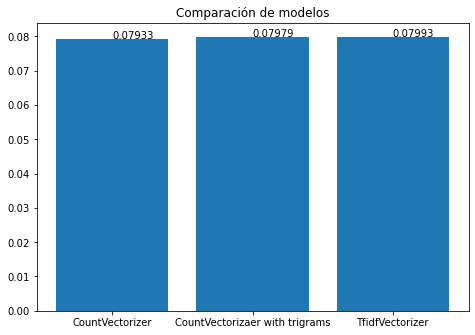

In [ ]:
# Celda 5

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#Asignamos el titulo
ax.set_title("Comparación de modelos")

ejeX = [ 'CountVectorizer','CountVectorizaer with trigrams', 'TfidfVectorizer']
ejeY = [round(mseCountVEctorizaer,5),round(mseCountVEctorizaerwithTrigrams,5),round(mseTfidfVectorizer,5)]
ax.bar(ejeX,ejeY)

def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

**Comentarios Finales**

En general, los resultados son bastante similares en terminos de desempeño se puede concluir que no hay una gran diferencia entre los tres modelos.
El primer modelo con CountVectorizer para preprocesar los comentarios, obtuvo un MSE de 0.0793. Luego, al utilizar trigramas, se obtuvo un MSE de 0.07979, ligeramente mayor que el modelo anterior. Finalmente, al utilizar la función TfidfVectorizer para preprocesar los comentarios, se obtuvo un MSE de 0.0799, mayor que los dos modelos anteriores. Teniendo estos resultados en cuenta, la diferencia en el desempeño es muy pequeña y podría variar según la métrica utilizada para evaluar cada uno de los modelos, sin embargo el MSE más bajo fue el de CountVectorizer, pero debido a que la diferencia es minima se podría utilizar cualquiera de los 3. A continuación presentaremos las ventajas y desventajas de cada uno de ellos:

Las ventajas del primer modelo se puede decir que es un Modelo simple y fácil de entender e implementar y puede ser útil para modelos que requieren un procesamiento rápido de texto. Sin embargo tiene areas de oportunidad ya que no considera la frecuencia de los términos en el conjunto de datos, lo que puede ser problemático cuando hay palabras comunes en los comentarios que no son relevantes para el análisis y como no considera las relaciones entre las palabras, es dificil que realmente entienda el significado completo de los comentarios.

Por otro lado, el segundo modelo con trigramas considera las relaciones entre las palabras, lo que puede mejorar la capacidad del modelo para entender el significado completo de los comentarios pero puede ser menos eficiente computacionalmente debido a la mayor cantidad de características.

Por ultimo, el Modelo con vectorizador TfidfVectorizer considera la frecuencia y la importancia relativa de los términos en el conjunto de datos, lo que puede ayudar al modelo a dar más peso a las palabras más importantes en los comentarios pero puede ser menos efectivo para modelos que requieren un procesamiento rápido de texto debido a su complejidad computacional.